In [1]:
## ====================================
## EET-4501 – Applied Machine Learning
## Assignment 3
## ====================================

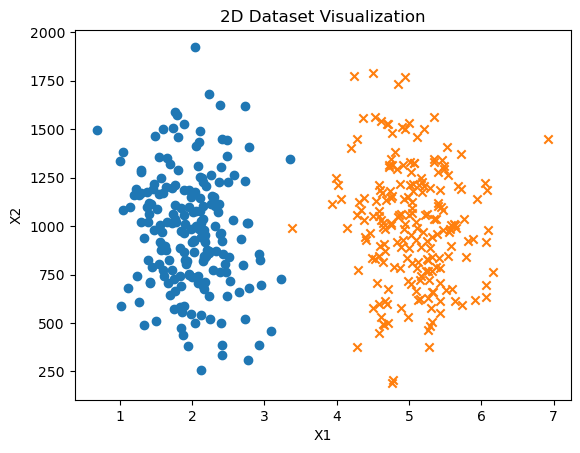

In [2]:
## Exploring the Data

import pandas as pd

df = pd.read_csv("knn_dataset.csv")
df.head()

df['label'].value_counts()

df.iloc[:, -1].value_counts()

import matplotlib.pyplot as plt

plt.figure()
class0 = df[df.iloc[:, -1] == 0]
class1 = df[df.iloc[:, -1] == 1]

plt.scatter(class0.iloc[:, 0], class0.iloc[:, 1], marker='o')
plt.scatter(class1.iloc[:, 0], class1.iloc[:, 1], marker='x')

plt.xlabel("X1")
plt.ylabel("X2")
plt.title("2D Dataset Visualization")
plt.show()

In [3]:
## Training Phase

X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

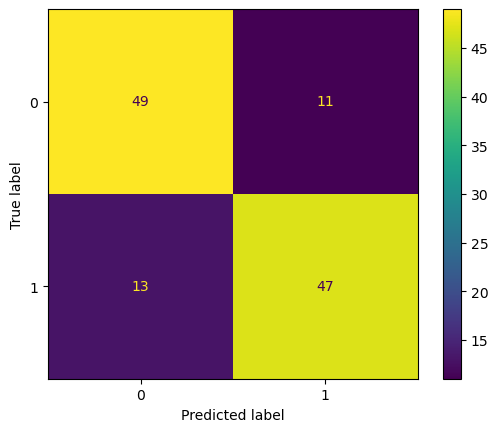

              precision    recall  f1-score   support

           0       0.79      0.82      0.80        60
           1       0.81      0.78      0.80        60

    accuracy                           0.80       120
   macro avg       0.80      0.80      0.80       120
weighted avg       0.80      0.80      0.80       120



In [4]:
## Learn a k-Nearest Neighbor (k-NN) Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

metrics = ['euclidean', 'manhattan']
k_values = [1, 5, 10, 25]

results = {}

for metric in metrics:
    results[metric] = []
    for k in k_values:
        model = KNeighborsClassifier(n_neighbors=k, metric=metric)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[metric].append(acc)

results_df = pd.DataFrame(results, index=k_values)
results_df

## The best hyperparameters for this dataset (without scaling) are:
## k = 1
## Distance metric = Manhattan
## This configuration achieved the highest test accuracy of 80%.
## Changing the value of k produced larger differences in accuracy compared to changing the distance metric.
## Therefore, the number of neighbors (k) has a greater impact on model performance than the choice of distance metric for this dataset.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

## Using: k = 1 and Manhattan distance
## Per Class Metrics
## Class 0
## Precision: 0.79
## Recall: 0.82
## F1-score: 0.80
## Class 1
## Precision: 0.81
## Recall: 0.78
## F1-score: 0.80
## Overall Metrics
## Accuracy: 0.80
## Macro Average F1-score: 0.80
## Weighted Average F1-score: 0.80
## The model performs similarly on both classes, which is expected because the dataset is balanced.

In [5]:
## Data Scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaled_results = []
non_scaled_results = []

for k in k_values:
    # Non-scaled
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    non_scaled_results.append(accuracy_score(y_test, y_pred))
    
    # Scaled
    model_scaled = KNeighborsClassifier(n_neighbors=k)
    model_scaled.fit(X_train_scaled, y_train)
    y_pred_scaled = model_scaled.predict(X_test_scaled)
    scaled_results.append(accuracy_score(y_test, y_pred_scaled))

comparison_df = pd.DataFrame({
    "Non-Scaled": non_scaled_results,
    "Scaled": scaled_results
}, index=k_values)

comparison_df

## After applying Min-Max Scaling, the accuracy improved.
## Best Non-Scaled Accuracy: 0.7667
## Best Scaled Accuracy: 1.00 (100%)
## The scaled configuration achieves better accuracy than the non-scaled configuration.
## After applying Min-Max scaling, the model reached 100% accuracy, compared to a maximum of approximately 77% without scaling.
## Scaling improves KNN performance because it is a distance-based algorithm.
## When features are not scaled, one feature dominates the distance calculation.
## Min-Max scaling ensures that both features contribute equally to the distance metric, leading to much better classification performance.
## Therefore, scaling is important when using KNN.

,Non-Scaled,Scaled
1,0.766667,1.0
5,0.550000,1.0
10,0.525000,1.0
25,0.450000,1.0
